<a href="https://colab.research.google.com/github/ljy9969/Study/blob/master/22-10-24%20Deep%20Learning_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
import pandas as pd
import os

In [30]:
from tensorflow.keras.datasets import cifar10

In [31]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
print("train dataset shape:", train_images.shape, train_labels.shape)
print("test dataset shape:", test_images.shape, test_labels.shape)

train dataset shape: (50000, 32, 32, 3) (50000, 1)
test dataset shape: (10000, 32, 32, 3) (10000, 1)


In [32]:
train_images[0, :, :, :], train_labels[0, :]

(array([[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],
 
        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],
 
        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],
 
        ...,
 
        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],
 
        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],
 
        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
  

In [33]:
NAMES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
print(train_labels[:10])

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]


## 1. CIFAR10 visualize

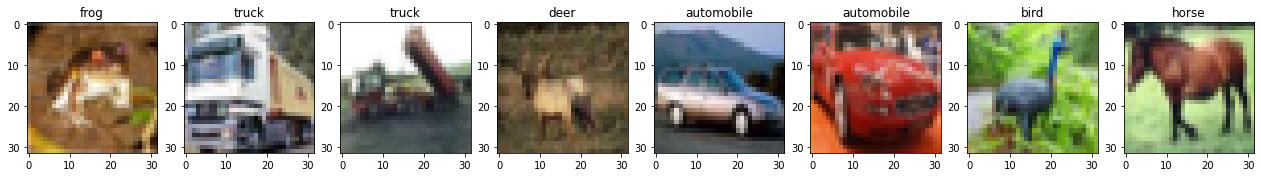

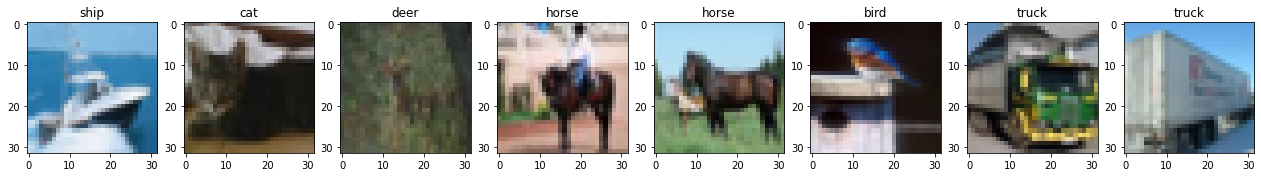

In [34]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

def show_images(images, labels, ncols = 8):
  figure, axs = plt.subplots(figsize = (22, 6), nrows = 1, ncols = ncols)
  for i in range(ncols):
    axs[i].imshow(images[i])
    label = labels[i].squeeze()
    axs[i].set_title(NAMES[int(label)])

show_images(train_images[:8], train_labels[:8])
show_images(train_images[8:16], train_labels[8:16])

In [35]:
print(train_labels[:8], train_labels[8:16]) # ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]] [[8]
 [3]
 [4]
 [7]
 [7]
 [2]
 [9]
 [9]]


In [36]:
for l in train_labels[:8]:
  print(l, NAMES[l])

[6] ['frog']
[9] ['truck']
[9] ['truck']
[4] ['deer']
[1] ['automobile']
[1] ['automobile']
[2] ['bird']
[7] ['horse']


## 2. Data Preprocessing

In [37]:
def get_preprocessed_data(images, labels):
  images = np.array(images/255.0, dtype = np.float32)
  lagels = np.array(labels, dtype = np.float32)

  return images, labels

train_images, train_labels = get_preprocessed_data(train_images, train_labels)
test_images, test_labels = get_preprocessed_data(test_images, test_labels)

In [38]:
print(train_images[:8], train_labels[:8])

[[[[0.23137255 0.24313726 0.24705882]
   [0.16862746 0.18039216 0.1764706 ]
   [0.19607843 0.1882353  0.16862746]
   ...
   [0.61960787 0.5176471  0.42352942]
   [0.59607846 0.49019608 0.4       ]
   [0.5803922  0.4862745  0.40392157]]

  [[0.0627451  0.07843138 0.07843138]
   [0.         0.         0.        ]
   [0.07058824 0.03137255 0.        ]
   ...
   [0.48235294 0.34509805 0.21568628]
   [0.46666667 0.3254902  0.19607843]
   [0.47843137 0.34117648 0.22352941]]

  [[0.09803922 0.09411765 0.08235294]
   [0.0627451  0.02745098 0.        ]
   [0.19215687 0.10588235 0.03137255]
   ...
   [0.4627451  0.32941177 0.19607843]
   [0.47058824 0.32941177 0.19607843]
   [0.42745098 0.28627452 0.16470589]]

  ...

  [[0.8156863  0.6666667  0.3764706 ]
   [0.7882353  0.6        0.13333334]
   [0.7764706  0.6313726  0.10196079]
   ...
   [0.627451   0.52156866 0.27450982]
   [0.21960784 0.12156863 0.02745098]
   [0.20784314 0.13333334 0.07843138]]

  [[0.7058824  0.54509807 0.3764706 ]
   [0.6

In [39]:
train_labels = train_labels.squeeze()
test_labels = test_labels.squeeze()

In [40]:
train_labels

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [41]:
test_labels

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [42]:
train_labels.ndim

1

## 3. Custom Model 생성

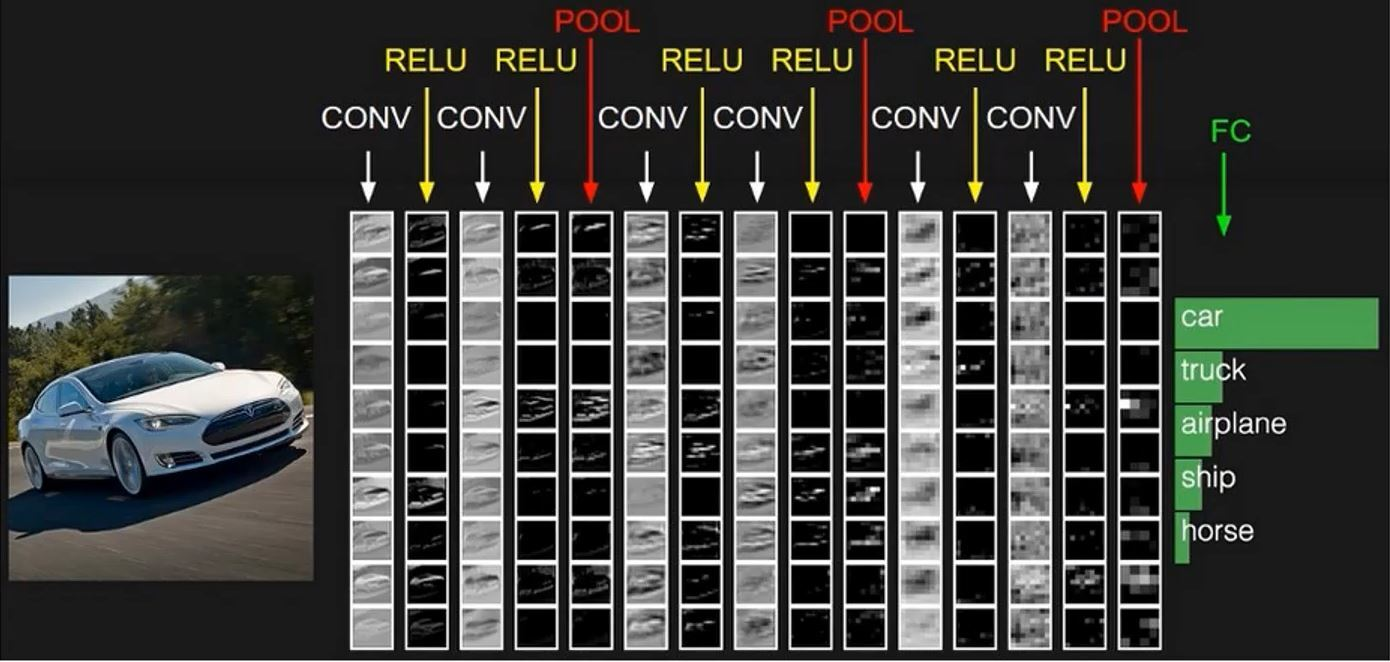

In [43]:
IMAGE_SIZE = 32

In [44]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, Flatten, Activation, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler

In [62]:
input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
x = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(input_tensor)
x = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(x)

In [63]:
x = Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')(x)
x = Conv2D(filters=64, kernel_size=(3, 3), padding='same')(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=2)(x)

In [64]:
x = Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu')(x)
x = Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=2)(x)

In [65]:
x = Flatten(name='flatten')(x)
x = Dropout(rate=0.5)(x)
x = Dense(300, activation='relu', name='fc1')(x)
x = Dropout(rate=0.3)(x)

In [66]:
output = Dense(10, activation='softmax', name='output')(x)
model = Model(inputs=input_tensor, outputs=output)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 conv2d_14 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 activation_2 (Activation)   (None, 32, 32, 64)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 64)       0   

In [67]:
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [76]:
history = model.fit(x = train_images, y = train_labels, batch_size = 64, epochs = 30, validation_split= 0.15)

Epoch 1/30
665/665 [==============================] - 13s 19ms/step - loss: 1.1950 - accuracy: 0.5680 - val_loss: 1.0673 - val_accuracy: 0.6209
Epoch 2/30
665/665 [==============================] - 12s 18ms/step - loss: 0.9997 - accuracy: 0.6444 - val_loss: 0.8793 - val_accuracy: 0.6884
Epoch 3/30
665/665 [==============================] - 11s 17ms/step - loss: 0.8752 - accuracy: 0.6893 - val_loss: 0.7819 - val_accuracy: 0.7237
Epoch 4/30
665/665 [==============================] - 11s 17ms/step - loss: 0.7757 - accuracy: 0.7274 - val_loss: 0.7303 - val_accuracy: 0.7413
Epoch 5/30
665/665 [==============================] - 11s 17ms/step - loss: 0.7035 - accuracy: 0.7530 - val_loss: 0.7186 - val_accuracy: 0.7563
Epoch 6/30
665/665 [==============================] - 11s 17ms/step - loss: 0.6370 - accuracy: 0.7751 - val_loss: 0.6577 - val_accuracy: 0.7708
Epoch 7/30
665/665 [==============================] - 11s 17ms/step - loss: 0.5902 - accuracy: 0.7916 - val_loss: 0.6638 - val_accuracy:

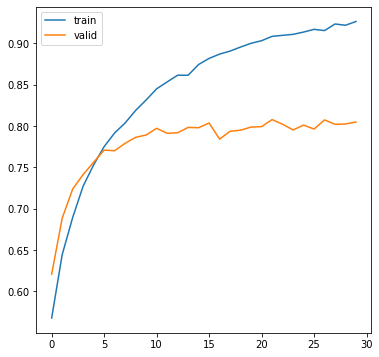

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline
def show_history(history):
    plt.figure(figsize=(6, 6))
    plt.yticks(np.arange(0, 1, 0.05))
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='valid')
    plt.legend()
    
show_history(history)

In [78]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 5ms/step - loss: 0.6967 - accuracy: 0.7979


[0.6967498660087585, 0.7979000210762024]

In [79]:
# preds = model.predict(test_images[0])
preds = model.predict(np.expand_dims(test_images[0], axis = 0))

1/1 [==============================] - 0s 15ms/step


In [80]:
print('예측 결과 shape:', preds.shape)
print('예측 결과:', preds)
preds.argmax()

예측 결과 shape: (1, 10)
예측 결과: [[8.3877431e-08 3.8458980e-12 4.2789768e-08 9.9362105e-01 2.3424407e-09
  6.3405707e-03 3.7800626e-05 3.9342959e-07 6.0115526e-09 5.0536175e-10]]


3

In [81]:
preds = model.predict(test_images[:32], batch_size = 32)
print('예측 결과 shape:', preds.shape)
print('예측 결과:', preds)

1/1 [==============================] - 0s 17ms/step
예측 결과 shape: (32, 10)
예측 결과: [[8.38780778e-08 3.84592792e-12 4.27896119e-08 9.93621171e-01
  2.34242314e-09 6.34055957e-03 3.78006698e-05 3.93423647e-07
  6.01157657e-09 5.05367526e-10]
 [1.06247237e-04 2.05057695e-05 4.20244851e-15 2.78970055e-12
  3.38775327e-16 2.80047820e-17 2.69235670e-13 4.03813610e-18
  9.99872565e-01 6.61462309e-07]
 [3.85074109e-01 1.31634315e-02 7.48041930e-06 1.75361405e-03
  2.38905318e-06 4.46253853e-06 4.71677140e-06 1.49160132e-05
  5.82453787e-01 1.75210834e-02]
 [9.74876463e-01 1.73546374e-03 6.07643335e-04 2.39247427e-04
  1.93538235e-05 4.30925356e-05 1.03316852e-04 2.23950246e-06
  2.22955029e-02 7.77129462e-05]
 [2.27128726e-19 1.56219376e-18 3.26145232e-06 1.19576725e-06
  1.35635617e-06 6.27692830e-13 9.99994278e-01 3.42358111e-17
  3.67431147e-17 1.87525024e-19]
 [1.50997395e-04 3.81480240e-05 3.63870431e-03 6.79653212e-02
  2.59230603e-02 2.22335309e-02 8.77089620e-01 6.92279020e-04
  2.085903

In [82]:
predicted_class = np.argmax(preds, axis = 1)
print('예측 클래스 값:', predicted_class)

예측 클래스 값: [3 8 8 0 6 6 1 4 3 1 0 9 5 7 9 8 5 3 8 6 7 0 4 9 4 2 4 0 9 6 6 5]


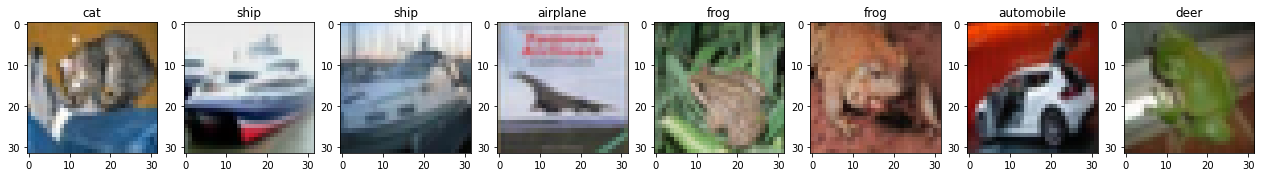

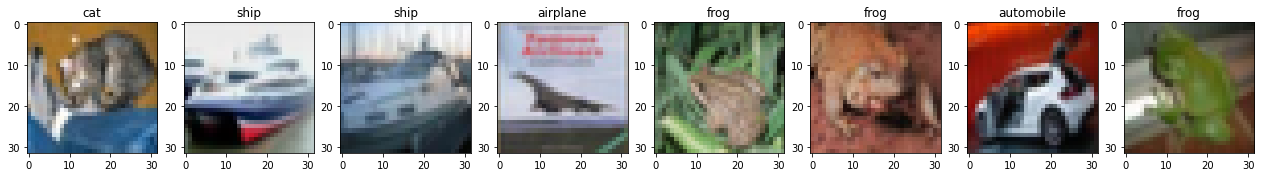

In [83]:
show_images(test_images[:8], predicted_class[:8], ncols = 8)
show_images(test_images[:8], test_labels[:8], ncols = 8)